In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
poll = pd.read_csv("pollution_us_2000_2016.csv/pollution_us_2000_2016.csv")

In [3]:
poll = poll.drop(['State Code','County Code','Site Num','Address','NO2 Units','O3 Units','SO2 Units','CO Units'],axis=1)
poll.head()

,ID,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,...,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,Arizona,Maricopa,Phoenix,1/1/2000,19.041667,49.0,19,46,0.022500,...,10,34,3.000000,9.0,21,13.0,1.145833,4.2,21,NaN
1,1,Arizona,Maricopa,Phoenix,1/1/2000,19.041667,49.0,19,46,0.022500,...,10,34,3.000000,9.0,21,13.0,0.878947,2.2,23,25.0
2,2,Arizona,Maricopa,Phoenix,1/1/2000,19.041667,49.0,19,46,0.022500,...,10,34,2.975000,6.6,23,NaN,1.145833,4.2,21,NaN
3,3,Arizona,Maricopa,Phoenix,1/1/2000,19.041667,49.0,19,46,0.022500,...,10,34,2.975000,6.6,23,NaN,0.878947,2.2,23,25.0
4,4,Arizona,Maricopa,Phoenix,1/2/2000,22.958333,36.0,19,34,0.013375,...,10,27,1.958333,3.0,22,4.0,0.850000,1.6,23,NaN


In [5]:
## Prepare all 4 AQIs against state and date 
pollSt = poll[['State','Date Local','NO2 AQI','O3 AQI','SO2 AQI','CO AQI']]
pollSt = pollSt.dropna(axis='rows')  # Delete rows with NAs
pollSt = pollSt[pollSt.State!='Country Of Mexico']  # Delete Mexico
pollSt['Date Local'] = pd.to_datetime(pollSt['Date Local'],format='%m/%d/%Y')  # Change date from string to date value
pollSt = pollSt.groupby(['State','Date Local']).mean()  # Take mean values if there are depulicated entries
pollStGrouped = pollSt.groupby(level=0)

In [7]:
## California AQIs - resampled monthly
pollCal = poll[(poll.State=='California')].copy()
pollCal['Date Local'] = pd.to_datetime(pollCal['Date Local'],format='%m/%d/%Y')
aqiCal = pollCal[['Date Local','NO2 AQI','O3 AQI','SO2 AQI','CO AQI']].groupby(['Date Local'])
aqiCal = aqiCal.mean()
aqiCal = aqiCal.resample('M').max() # Take maximum value over month for 4 AQIs. You can also use mean()
## Texas AQIs - resampled monthly
pollTex = poll[(poll.State=='Texas')].copy()
pollTex['Date Local'] = pd.to_datetime(pollTex['Date Local'],format='%m/%d/%Y')
aqiTex = pollTex[['Date Local','NO2 AQI','O3 AQI','SO2 AQI','CO AQI']].groupby(['Date Local'])
aqiTex = aqiTex.mean()
aqiTex = aqiTex.resample('M').max()
## New York AQIs - resampled monthly
pollNY = poll[(poll.State=='New York')].copy()
pollNY['Date Local'] = pd.to_datetime(pollNY['Date Local'],format='%m/%d/%Y')
aqiNY = pollNY[['Date Local','NO2 AQI','O3 AQI','SO2 AQI','CO AQI']].groupby(['Date Local'])
aqiNY = aqiNY.mean()
aqiNY = aqiNY.resample('M').max()
## Illinois AQIs - resampled monthly
pollIL = poll[(poll.State=='Illinois')].copy()
pollIL['Date Local'] = pd.to_datetime(pollIL['Date Local'],format='%m/%d/%Y')
aqiIL = pollIL[['Date Local','NO2 AQI','O3 AQI','SO2 AQI','CO AQI']].groupby(['Date Local'])
aqiIL = aqiIL.mean()
aqiIL = aqiIL.resample('M').max()

In [9]:
import os
os.environ['PROJ_LIB'] = 'C:/Users/viole/Anaconda3/Lib/site-packages/mpl_toolkits/basemap'
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
import shapefile
%matplotlib nbagg

<IPython.core.display.Javascript object>


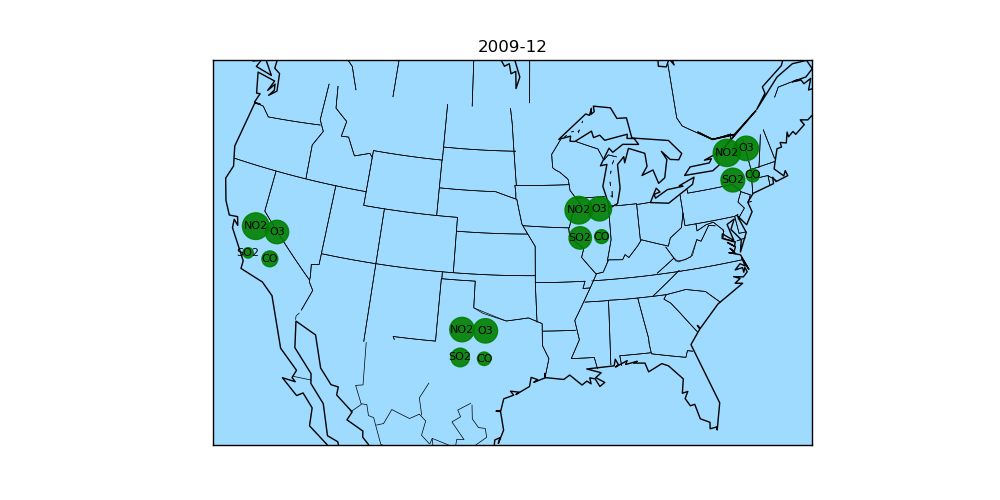

In [17]:
## Plot data onto the basemap with FuncAnimation (displaying 4 AQI data over time)
fig = plt.figure(figsize=(10,5))
map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
#map = Basemap(projection='lcc', resolution='h', lat_0=37.5, lon_0=-119, width=1E6, height=1.2E6)


#map.readshapefile('../input/st99_d00', name='states', drawbounds=True)
map.drawcoastlines()
map.drawmapboundary(fill_color='#9fdbff',zorder=1)
#map.fillcontinents(color='#f0f8ff',lake_color='#9fdbff',alpha=0.8,zorder=1.5)
#map.drawcountries(linewidth=1.5, color='darkblue')
map.drawstates()
map.drawcounties(color = 'red')

ax = plt.gca()

## Initialize 
sizesCal = aqiCal.iloc[0]*10
colorsCal = aqiCal.iloc[0]
sizesTex = aqiTex.iloc[0]*10
colorsTex = aqiTex.iloc[0]
sizesNY = aqiNY.iloc[0]*10
colorsNY = aqiNY.iloc[0]
sizesIL = aqiIL.iloc[0]*10
colorsIL = aqiIL.iloc[0]
cmap, norm = mpl.colors.from_levels_and_colors([0,50,100,150,200,300,500], ['green','yellow','orange','red','purple','maroon'])
m = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
plt.title(aqiCal.index[0].strftime('%Y-%m'))

# California
x1,y1=map(-120.4179,37.7783)
x2,y2=map(-118.4179,37.7783)
x3,y3=map(-120.4179,35.7783)
x4,y4=map(-118.4179,35.7783)
scatter1 = map.scatter(np.array([x1,x2,x3,x4]),np.array([y1,y2,y3,y4]),s=sizesCal,c=colorsCal,cmap=cmap,norm=norm,alpha=0.9,edgecolors='face',zorder=3)
x=[x1,x2,x3,x4]
y=[y1,y2,y3,y4]
labels=['NO2','O3','SO2','CO']
for i, txt in enumerate(labels):
    ax.annotate(labels[i],(x[i],y[i]),size=8,va='center',ha='center')

# Texas
x1,y1=map(-100.9018,32.9686)
x2,y2=map(-98.9018,32.9686)
x3,y3=map(-100.9018,30.9686)
x4,y4=map(-98.9018,30.9686)
scatter2 = map.scatter(np.array([x1,x2,x3,x4]),np.array([y1,y2,y3,y4]),s=sizesTex,c=colorsTex,cmap=cmap,norm=norm,alpha=0.9,edgecolors='face',zorder=3)
x=[x1,x2,x3,x4]
y=[y1,y2,y3,y4]
labels=['NO2','O3','SO2','CO']
for i, txt in enumerate(labels):
    ax.annotate(labels[i],(x[i],y[i]),size=8,va='center',ha='center')

# New York
x1,y1=map(-75.2179,44.2994)
x2,y2=map(-73.2179,44.2994)
x3,y3=map(-75.2179,42.2994)
x4,y4=map(-73.2179,42.2994)
scatter3 = map.scatter(np.array([x1,x2,x3,x4]),np.array([y1,y2,y3,y4]),s=sizesNY,c=colorsNY,cmap=cmap,norm=norm,alpha=0.9,edgecolors='face',zorder=3)
x=[x1,x2,x3,x4]
y=[y1,y2,y3,y4]
labels=['NO2','O3','SO2','CO']
for i, txt in enumerate(labels):
    ax.annotate(labels[i],(x[i],y[i]),size=8,va='center',ha='center')    

# Illinois
x1,y1=map(-90.3985,41.6331)
x2,y2=map(-88.3985,41.6331)
x3,y3=map(-90.3985,39.6331)
x4,y4=map(-88.3985,39.6331)
scatter4 = map.scatter(np.array([x1,x2,x3,x4]),np.array([y1,y2,y3,y4]),s=sizesIL,c=colorsIL,cmap=cmap,norm=norm,alpha=0.9,edgecolors='face',zorder=3)
x=[x1,x2,x3,x4]
y=[y1,y2,y3,y4]
labels=['NO2','O3','SO2','CO']
for i, txt in enumerate(labels):
    ax.annotate(labels[i],(x[i],y[i]),size=8,va='center',ha='center')     
    
## Update function for animation
def update(i):
    scatter1.set_sizes(aqiCal.iloc[i]*10)
    scatter1.set_color(m.to_rgba(aqiCal.iloc[i]))
    scatter2.set_sizes(aqiTex.iloc[i]*10)
    scatter2.set_color(m.to_rgba(aqiTex.iloc[i]))
    scatter3.set_sizes(aqiNY.iloc[i]*10)
    scatter3.set_color(m.to_rgba(aqiNY.iloc[i]))
    scatter4.set_sizes(aqiIL.iloc[i]*10)
    scatter4.set_color(m.to_rgba(aqiIL.iloc[i]))
    plt.title(aqiCal.index[i].strftime('%Y-%m'))
    return scatter1, scatter2, scatter3, scatter4, 

anim = FuncAnimation(plt.gcf(),update,interval=100,blit=True,repeat=False,frames=196)
#anim.save('aqis.gif', writer='imagemagick')
#anim